# This project is strictly to implement different statistical techniques appropriately and to infer the results to understand the value statistics provides along with some visualizations. 

# The following is the dataset link:
# https://www.kaggle.com/sazid28/diabetes/version/1

In [7]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [8]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [10]:
df=df.astype('int64')  # Uncomment when you implement this code for the first time.
print("Consider Outcome variable as the target variable which is binary in nature")

Consider Outcome variable as the target variable which is binary in nature


In [11]:
print("Number of non-diabetic cases",len(df[df.Outcome==0]))
print("Number of diabetic cases", len(df[df.Outcome==1]))

Number of non-diabetic cases 500
Number of diabetic cases 268


## Find the mean, median, quartile ranges, standard deviation of the variables in the data

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


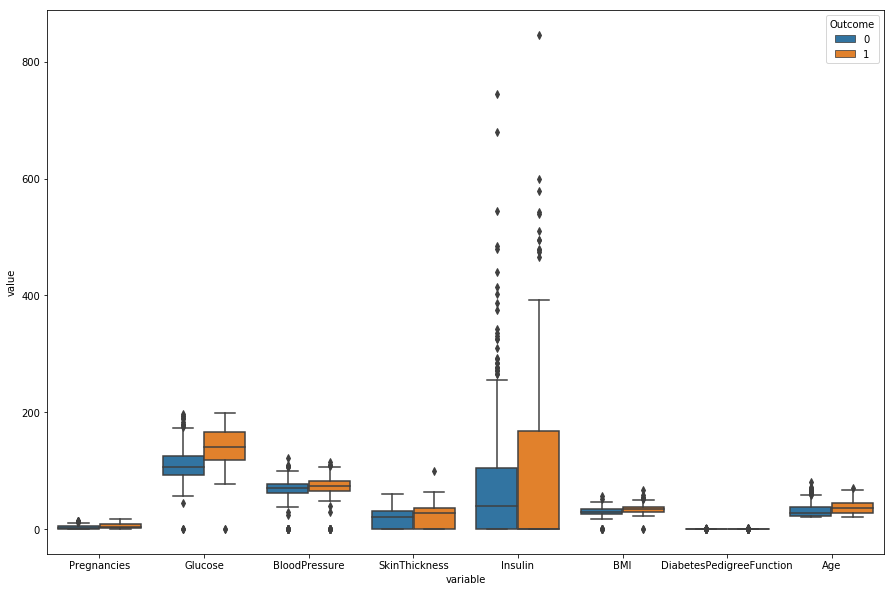

	 There are outliers in glucose, B.P, Skin thickness, Insulin, BMI, and Age


In [12]:
# Identifying outliers first
melted_data = pd.melt(df,id_vars = "Outcome",value_vars = df.columns[:-1])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="Outcome",data= melted_data)
plt.show()
print("\t","There are outliers in glucose, B.P, Skin thickness, Insulin, BMI, and Age")

## Normality test. It defines whether to use parametric (if normal variable) or non-parametric statistical tests (if non-normal variable)

In [ ]:
# Null-hypothesis: data is normally distributed
# Alternate-hypothesis: data is not normally distributed
# If p-value is less than 0.05 (95% CI) we reject normal distribution hypothesis.

In [13]:
# shapiro wilk test and Kolmogorov-Smirnov test
from scipy import stats
for i in range(len(df.columns)-1):
    test_value, p_value=stats.shapiro(df[df.columns[i]])
    test_value1=stats.kstest(df[df.columns[i]], cdf='norm')
    print("The shapiro value for", df.columns[i], "is", test_value, "with P value", p_value)
    print("The Kolmogorov-Smirnov for", df.columns[i], "is", test_value1,"\n")


The shapiro value for Pregnancies is 0.9042782783508301 with P value 1.6080885881590613e-21
The Kolmogorov-Smirnov for Pregnancies is KstestResult(statistic=0.6968134960685429, pvalue=0.0) 

The shapiro value for Glucose is 0.9701042175292969 with P value 1.9867612763291298e-11
The Kolmogorov-Smirnov for Glucose is KstestResult(statistic=0.9934895833333334, pvalue=0.0) 

The shapiro value for BloodPressure is 0.8189212083816528 with P value 1.5840069624449098e-28
The Kolmogorov-Smirnov for BloodPressure is KstestResult(statistic=0.9544270833333334, pvalue=0.0) 

The shapiro value for SkinThickness is 0.90462726354599 with P value 1.75157635361056e-21
The Kolmogorov-Smirnov for SkinThickness is KstestResult(statistic=0.7044270833320534, pvalue=0.0) 

The shapiro value for Insulin is 0.7220207452774048 with P value 7.915248149269491e-34
The Kolmogorov-Smirnov for Insulin is KstestResult(statistic=0.5130208333333333, pvalue=0.0) 

The shapiro value for BMI is 0.9502735733985901 with P val

### Interpretation of normality test: Both tests have p-value less than 0.05 for all the variables. Hence, we say data is not normally distributed. 
### But, wait is it "TRUE", lets check out with QQ plots and kde plots

Pregnancies


<Figure size 576x360 with 0 Axes>

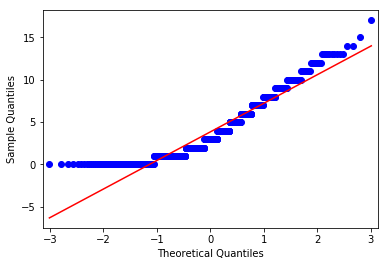

Glucose


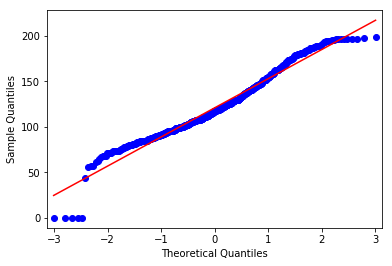

BloodPressure


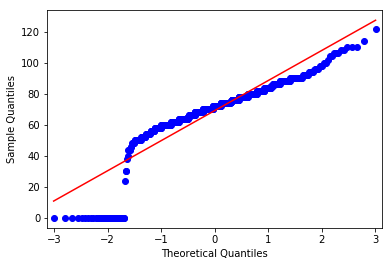

SkinThickness


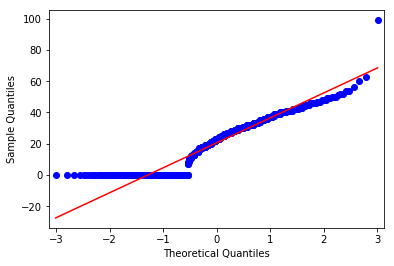

Insulin


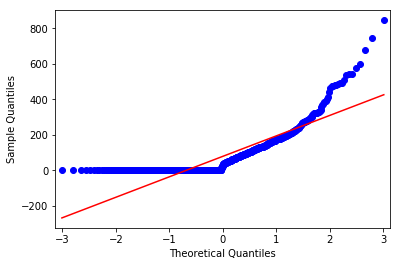

BMI


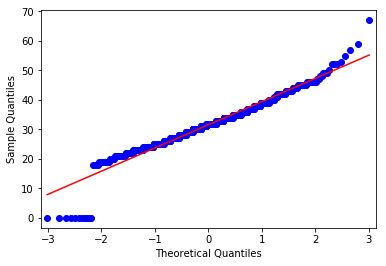

DiabetesPedigreeFunction


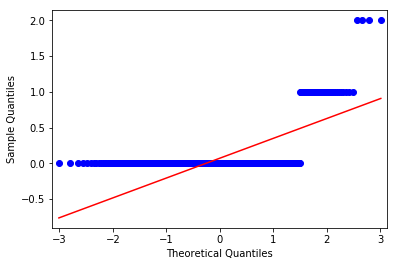

Age


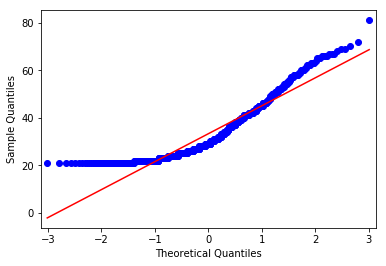

In [14]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
fig = plt.figure(figsize=(8,5)) 
for i in range(len(df.columns)-1):
    print(df.columns[i])
    qqplot(df[df.columns[i]], line='s')
    pyplot.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


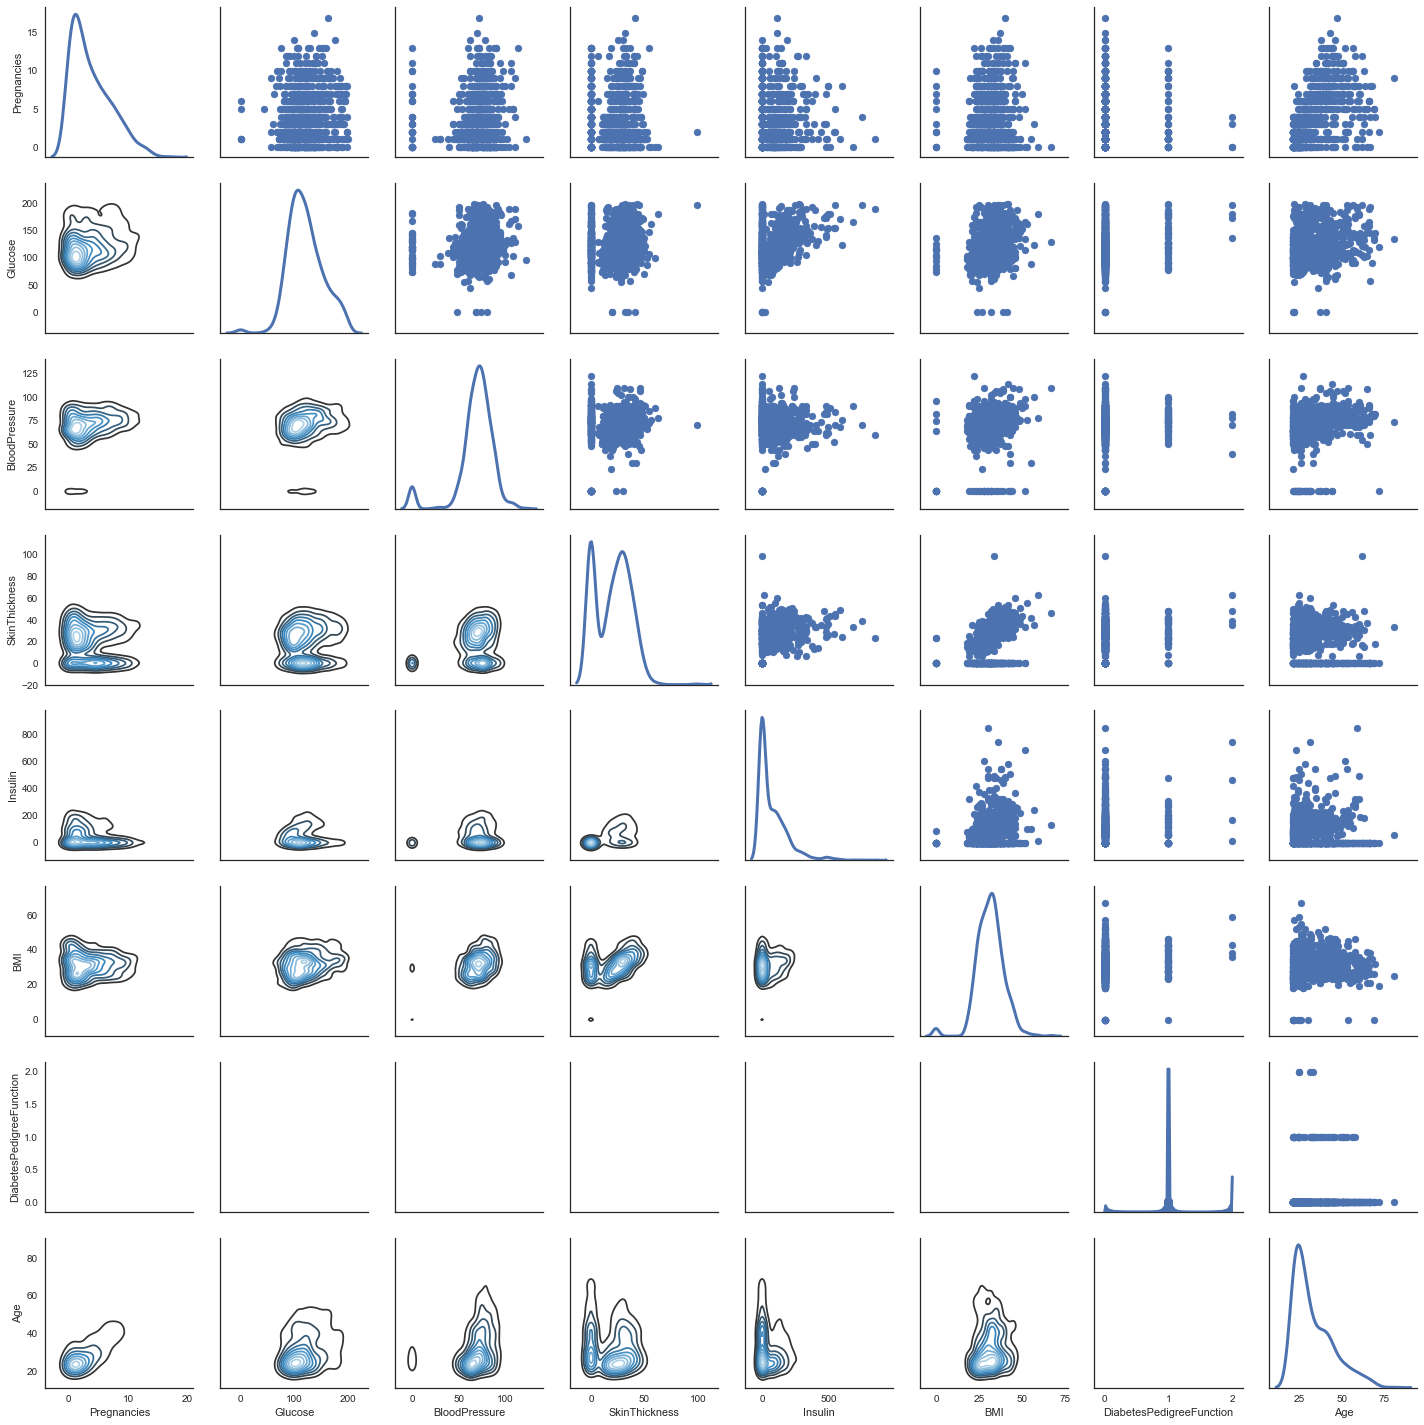

In [66]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df1 = df.iloc[:,:-1]
g = sns.PairGrid(df1,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)

plt.show()

####  It seems from the above plots we can approximate that glucose, blood pressure, skin thickness, and BMI follow normality.
#### The reason the tests have shown that they are not normal is because they might have picked the mild skewed data which we can see in the QQ PLOTS or KDE plots for variables glucose, blood pressure, skin thickness, and BMI.

# Find correlation between variables

In [16]:
# Covariance: The extent with which two variables vary together
print("Covariance between Insulin and glucose: ",df.Insulin.cov(df.Glucose))
# Pearson correlation
p1 = df.loc[:,["Insulin","Glucose"]].corr(method= "pearson")
p2 = df.Insulin.cov(df.Glucose)/(df.Insulin.std()*df.Glucose.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Covariance between Insulin and glucose:  1220.9357989732723
Pearson correlation: 
          Insulin   Glucose
Insulin  1.000000  0.331357
Glucose  0.331357  1.000000
Pearson correlation:  0.3313571099202085


#### The above covariance and pearson correlation makes sense because if glucose increases the insulin should also increase to store excess glucose (positive correlation)
#### This can be evaluated using heat-map below which aligns with above correlation.

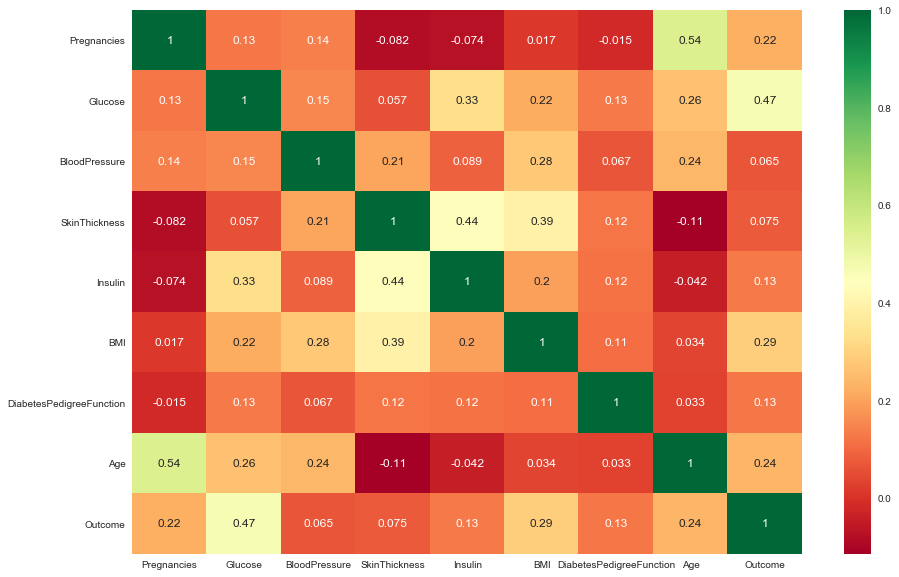

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df1=df[df['Outcome']==1]
#get correlations of each features in dataset
corrmat = df1.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### This is a pearson correlation heat map which shows the strength of correlation between the variables. Negative value indicates opposite correlation among variables. Positive value indicates associated correlation among the variables

#### Spearman rank test is another similar test but it evaluates based on ranks in the variable instead of values

#### This correlation not only gives information about important features but also multi-collinearity problem between the independent features

# Find if there is any difference in variables among more than two groups

#### Assumptions for Anova
#### 1) The residuals should follow normality distribution (Note: Group sizes are unequal, so I don't want to manipulate data here to check this assumption)
#### 2) Homogeneity of variance
#### As tests for normality are stated above. Lets use homogeneity of variance tests


In [53]:
# Levenes test for homogeneity of variance
stats.levene(df['Insulin'][df['DiabetesPedigreeFunction'] == 0], 
             df['Insulin'][df['DiabetesPedigreeFunction'] == 1],
             df['Insulin'][df['DiabetesPedigreeFunction'] == 2])

LeveneResult(statistic=7.00709121199806, pvalue=0.0009647106810433818)

In [76]:

print("Interpretation:\nThe p-value is lessthan 0.05 which means there is no homogeneity of variance between diabetes and non-diabetes")
print("This means the anova assumptions are violated and we cannot use anova, instead we can use Kruskal-Wallis test")

Interpretation:
The p-value is lessthan 0.05 which means there is no homogeneity of variance between diabetes and non-diabetes
This means the anova assumptions are violated and we cannot use anova, instead we can use Kruskal-Wallis test


In [57]:
# Kruskal-Wallis test (# non-parametric version of Anova, Can use when anova assumptions are violated)

stats.kruskal(df['Insulin'][df['DiabetesPedigreeFunction'] == 0], 
             df['Insulin'][df['DiabetesPedigreeFunction'] == 1],
             df['Insulin'][df['DiabetesPedigreeFunction'] == 2])


KruskalResult(statistic=7.690370098744764, pvalue=0.021382444387118265)

In [77]:
print("Interpretation:\nThe results show that there is significant affect of DiabetesPedigreeFunction(i.e., Inheritance factor) on Insulin production")

Interpretation:
The results show that there is significant affect of DiabetesPedigreeFunction(i.e., Inheritance factor) on Insulin production


### Let's see what would have happened if we used Anova

In [60]:
# Anova test
from scipy.stats import f_oneway

stats.f_oneway(df['Insulin'][df['DiabetesPedigreeFunction'] == 0], 
             df['Insulin'][df['DiabetesPedigreeFunction'] == 1],
             df['Insulin'][df['DiabetesPedigreeFunction'] == 2])

F_onewayResult(statistic=11.814068128675174, pvalue=8.848234241842227e-06)

In [78]:
print("Interpretation:\nThe Anova results still align with the Kruskal's results but falsely shows the strength of relation to be strong")

Interpretation:
The Anova results still align with the Kruskal's results but falsely shows the strength of relation to be strong


# Find if there is any difference in the variables between two groups

In [21]:
# split diabetes and non-diabetes groups
diabetes=df[df['Outcome']==1]
non_diabetes=df[df['Outcome']==0]

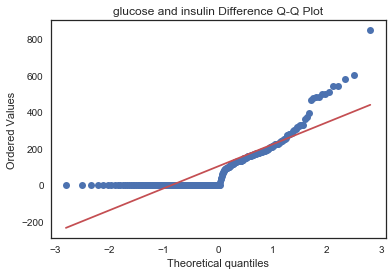

In [88]:
# To test normality, will use QQ-plot as shapiro test is affected by the mild skewed data
stats.probplot(diabetes['Insulin'], plot= plt)
plt.title('glucose and insulin Difference Q-Q Plot')
plt.savefig('glucose and insulin difference qq plot.png')

In [86]:
# Levenes test for homogeneity of variance
print(stats.levene(diabetes['Insulin'], non_diabetes['Insulin']))
print("The p-value is less than 0.05 which means there is no homogeneity of variance between diabetes and non-diabetes")

LeveneResult(statistic=17.816198122792112, pvalue=2.7248886440415158e-05)
The p-value is less than 0.05 which means there is no homogeneity of variance between diabetes and non-diabetes


### Normality test and homogeneity of variance assumption is violated according to QQplot and Levene test respectively
### Hence, will use Mannwhitney_U_test

In [27]:
# mannwhitney_U_test  (non-parametric version of student's t-test, can use when homogeneity of varaince and normality are violated)
from scipy.stats import mannwhitneyu
data1, data2 = non_diabetes['BloodPressure'], diabetes['BloodPressure']
stat, p = mannwhitneyu(data1, data2)
print(stat, p)

55414.5 3.7792562301197405e-05


In [90]:
print("Interpretation:\nResults show that p-value is less than 0.05 which means there is significant difference in B.P between\
 non-diabetes and diabetes groups")

Interpretation:
Results show that p-value is less than 0.05 which means there is significant difference in B.P between non-diabetes and diabetes groups


In [26]:
# Welch's test (use instead of students t-test, when test for homogeneity fails)

def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",f"Welch's t-test= {t:.4f}", "\n",f"p-value = {p:.4f}", "\n",f"Degrees of Freedom= {dof:.4f}")

welch_ttest(diabetes['Insulin'], non_diabetes['Insulin'])


 Welch's t-test= 3.3009 
 p-value = 0.0010 
 Degrees of Freedom= 415.7530


In [91]:
print("Interpretation:\nThe Welch's test also indicates that there is significant difference in B.P. b/w non-diabetes\
 and diabetes groups")

Interpretation:
The Welch's test also indicates that there is significant difference in B.P. b/w non-diabetes and diabetes groups


## Let's see what happens if we use student's t-test
#### Ignoring normality of residuals assumption as differences between two groups cannot be identified unless data is manipulated.
#### But as the blood pressure variable is normally distributed.

In [96]:
# student's t-test
# ! pip install --user researchpy (uncomment if you don't have researchpy)
import researchpy as rp
from scipy.stats import ttest_ind
stat, p=ttest_ind(non_diabetes['BloodPressure'],diabetes['BloodPressure'] )
desc, results = rp.ttest(non_diabetes['BloodPressure'],diabetes['BloodPressure'] )
print("p-value:", p)
results

p-value: 0.07151390009776082


,Independent t-test,results
0,Difference (BloodPressure - BloodPressure) =,-2.6406
1,Degrees of freedom =,766.0000
2,t =,-1.8047
3,Two side test p value =,0.0715
4,Mean of BloodPressure > mean of BloodPressure ...,0.0358
5,Mean of BloodPressure < mean of BloodPressure ...,0.9642
6,Cohen's d =,-0.1366
7,Hedge's g =,-0.1365
8,Glass's delta =,-0.1462
9,r =,0.0651


In [98]:
print("Interpretation:\nStudent's t-test shows that the difference is non-significant with p-value more than 0.05 i.e.,\
 False results")

Interpretation:
Student's t-test shows that the difference is non-significant with p-value more than 0.05 i.e., False results


# Find if two variables are related (dependency test) of the same group

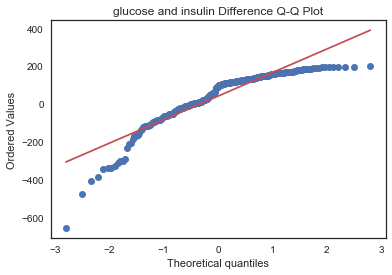

In [80]:
# Paired t-test (to compare two variables of same group)
# Assumptions the difference between the two variables tested should be normally distributed
diabetes['glu_ins_diff'] = diabetes['Glucose'] - diabetes['Insulin']
stats.probplot(diabetes['glu_ins_diff'], plot= plt)
plt.title('glucose and insulin Difference Q-Q Plot')
plt.savefig('glucose and insulin difference qq plot.png')


### The above plot shows they are not normally distributed which violates the assumption of paired student's t (parametric) test.
### Hence, we should test using Wilcoxon signed rank test

In [81]:
# Wilcoxon signed rank test
print("wilcoxon signed rank test",stats.wilcoxon(diabetes['glu_ins_diff']))
print("Interpretation:\nThe lower pvalue suggests that there is significant difference between glucose and insulin levels in diabetes group")

wilcoxon signed rank test WilcoxonResult(statistic=9520.5, pvalue=5.484971936403593e-11)
Interpretation:
The lower pvalue suggests that there is significant difference between glucose and insulin levels in diabetes group


In [82]:
# Let's see what would have happened if we used paired student's t test
print("Interpretation:\nPaired sample t-test",stats.ttest_rel( diabetes['Glucose'],diabetes['Insulin']))
print("Paired sample t-test aligns with Wilcoxon signed rank test")

Interpretation:
Paired sample t-test Ttest_relResult(statistic=5.00170578812433, pvalue=1.0311541745547062e-06)
Paired sample t-test aligns with Wilcoxon signed rank test


# Find if the two categorical variables are related

In [41]:
# chisquare-test
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(df['DiabetesPedigreeFunction'], df['Outcome'])
stats.chi2_contingency(cross_tab)


(12.23141822800889,
 0.002207909554583249,
 2,
 array([[466.796875  , 250.203125  ],
        [ 30.59895833,  16.40104167],
        [  2.60416667,   1.39583333]]))

In [83]:
print("Interpretation:\nThe chi-square test is signficant but is it right??/n Certain values in the array are lessthan 5 which violates chi-square assumption of expected cell frequency to be >=5 \n")
print("In this case, we can use Fisher's exact test, but it works on 2x2 table. So, we will divide the variable as follows")

Interpretation:
The chi-square test is signficant but is it right??/n Certain values in the array are lessthan 5 which violates chi-square assumption of expected cell frequency to be >=5 

In this case, we can use Fisher's exact test, but it works on 2x2 table. So, we will divide the variable as follows


In [34]:
dummies = pd.get_dummies(df['DiabetesPedigreeFunction'])
dummies.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [38]:
## Fishers exact test
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[series], df['Outcome'])
    print(crosstab, nl)
    stats.fisher_exact(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Outcome    0    1
0                
0         22   29
1        478  239 

Chi2 value= 1.348636086582793
p-value= 0.24551669956113023
Degrees of freedom= 1

Outcome    0    1
1                
0        479  242
1         21   26 

Chi2 value= 1.348636086582793
p-value= 0.24551669956113023
Degrees of freedom= 1

Outcome    0    1
2                
0        499  265
1          1    3 

Chi2 value= 1.348636086582793
p-value= 0.24551669956113023
Degrees of freedom= 1



In [84]:
print("Interpretation:\nThere is no relation between diabetes pedigree function and diabetes")
print("But, we will see what would have happened if chi-square was used")

Interpretation:
There is no relation between diabetes pedigree function and diabetes
But, we will see what would have happened if chi-square was used


In [35]:
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[series], df['Outcome'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Outcome    0    1
0                
0         22   29
1        478  239 

Chi2 value= 10.590360038351193
p-value= 0.0011367883715496872
Degrees of freedom= 1

Outcome    0    1
1                
0        479  242
1         21   26 

Chi2 value= 8.259030912660116
p-value= 0.0040549768330152705
Degrees of freedom= 1

Outcome    0    1
2                
0        499  265
1          1    3 

Chi2 value= 1.348636086582793
p-value= 0.24551669956113023
Degrees of freedom= 1



In [99]:
print("Interpretation:\nThe chi-square results show that pedigree function has significant relation with\
 diabetes at values 0, 1 i.e., FALSE results")

Interpretation:
The chi-square results show that pedigree function has significant relation with diabetes at values 0, 1 i.e., FALSE results
